In [1]:
import ect
from ect_optim import ECTFilterTuner
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/20
ect_offset = radius/10

n_knots = 20

In [2]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return np.abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [3]:
opt = ECTFilterTuner(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y)
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-26.869
Current loss=-27.348
Current loss=-27.438
Current loss=-27.521
Current loss=-27.555
Current loss=-27.602
Current loss=-27.660
Current loss=-27.709
Current loss=-27.752
Current loss=-27.760
Current loss=-27.766
Current loss=-27.767
Current loss=-27.769
Current loss=-27.771
Current loss=-27.774
Current loss=-27.775
Current loss=-27.775
Current loss=-27.776
Current loss=-27.777
Current loss=-27.777
Current loss=-27.778
Current loss=-27.778
Current loss=-27.779
Current loss=-27.781
Current loss=-27.782
Current loss=-27.783
Current loss=-27.784
Current loss=-27.786
Current loss=-27.787
Current loss=-27.788
Current loss=-27.788
Current loss=-27.789
Current loss=-27.789
Current loss=-27.790
Current loss=-27.790
Current loss=-27.791
Current loss=-27.792
Current loss=-27.792
Current loss=-27.792
Current loss=-27.793
Current loss=-27.793
Current loss=-27.793
Current loss=-27.793
Current loss=-27.793
Current loss=-27.793
Current loss=-27.793
Current loss=-27.793
Current loss=

In [4]:
result

      fun: -27.793077051726133
 hess_inv: array([[ 5.83293975e+01, -3.55506948e+02, -4.19194176e+01, ...,
        -5.37734536e+00, -5.30934217e+00, -5.03704693e+00],
       [-3.55506948e+02,  2.46012364e+03,  3.18883726e+02, ...,
         4.60500776e+01,  4.55008420e+01,  4.30703568e+01],
       [-4.19194176e+01,  3.18883726e+02,  6.10265754e+01, ...,
         7.72473001e+00,  7.63707366e+00,  7.22049757e+00],
       ...,
       [-5.37734536e+00,  4.60500776e+01,  7.72473001e+00, ...,
         1.49504052e+00,  1.43717904e+00,  1.37716922e+00],
       [-5.30934217e+00,  4.55008420e+01,  7.63707366e+00, ...,
         1.43717904e+00,  1.45025437e+00,  1.33169108e+00],
       [-5.03704693e+00,  4.30703568e+01,  7.22049757e+00, ...,
         1.37716922e+00,  1.33169108e+00,  1.35959806e+00]])
      jac: array([ 1.43051147e-06,  2.38418579e-07,  7.15255737e-07,  2.38418579e-07,
        7.15255737e-07,  0.00000000e+00,  4.76837158e-07,  7.15255737e-07,
        2.38418579e-07,  2.62260437e-06,

opt.loss(solution)=-27.793077051726133


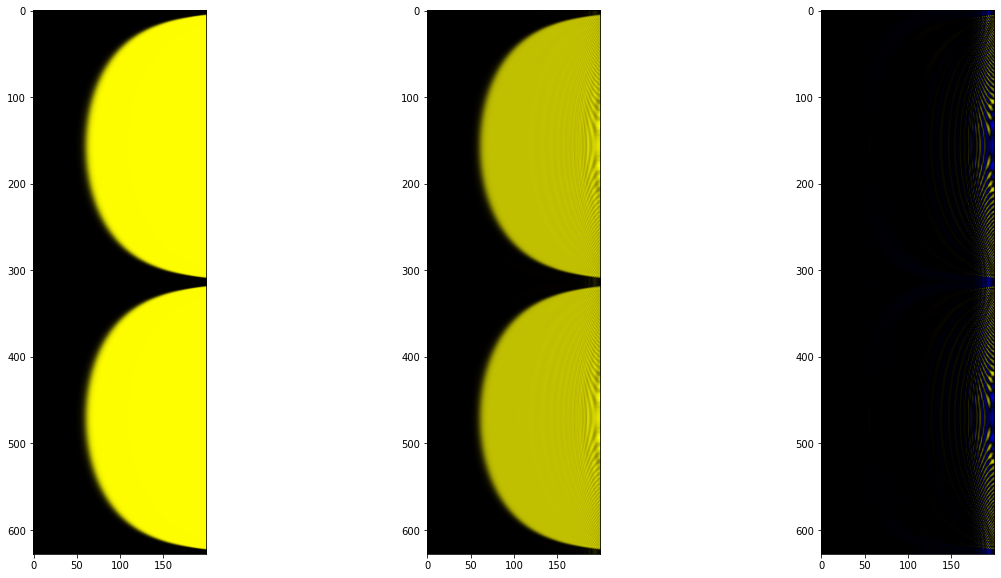

In [5]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [6]:
res = opt.inv

knots_freq = solution[:n_knots]
knots_space = solution[n_knots:2*n_knots]

fnf = ect.freqnorm(res.shape[:2], radius, knots_freq)
snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_freq=}")
print(f"{knots_space=}")

knots_freq=array([ 3.44326657, -3.16696616,  0.04790174,  0.42392524,  0.44505792,
        0.39451561,  0.43162363,  0.34883153,  0.38841102,  0.39973596,
        0.43523297,  0.39693692,  0.39257722,  0.46892448,  0.39590382,
        0.42261366,  0.39275321,  0.41902006,  0.39382405,  0.56032091])
knots_space=array([-0.04131348, -0.01749437,  0.02962984, -0.04737321,  0.52173417,
        2.8018003 ,  3.39445275,  3.41977847,  3.42927597,  3.43180358,
        3.42686058,  3.42477615,  3.41943678,  3.42042215,  3.42064609,
        3.4200497 ,  3.41982597,  3.41333249,  3.36805434,  3.19141969])


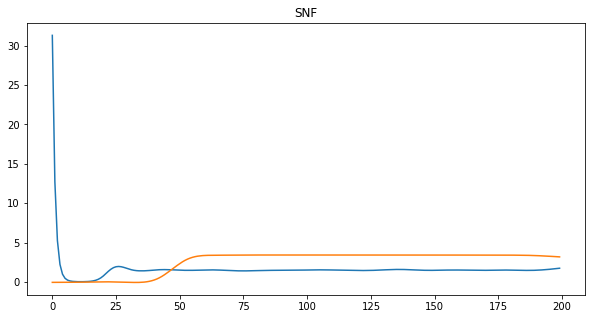

In [7]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.title("FNF")
plt.plot(fnf[0,:])

# plt.subplot(1, 2, 2)
plt.title("SNF")
plt.plot(snf[0,:])

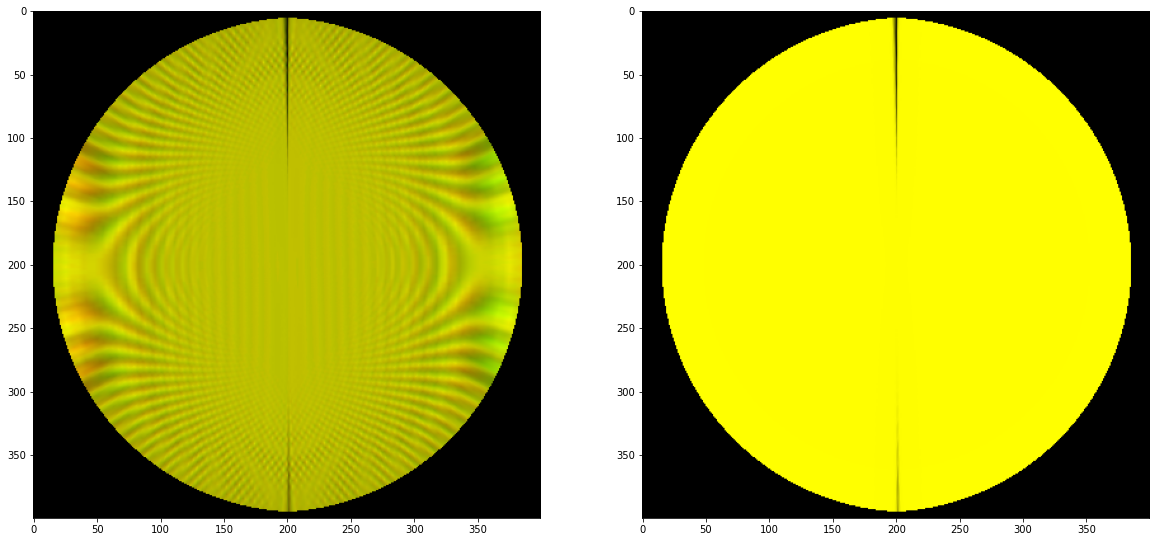

In [8]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)